In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [48]:
result_base_dir = './recode/IMPUTEDLIBD/'
result_files = [i for i in os.listdir(result_base_dir) if i.endswith('.csv')]

dfs = []

for f in result_files:
    df_dir = os.path.join(result_base_dir,f)
    dfs.append(pd.read_csv(df_dir,index_col=0))

dfs = pd.concat(dfs, ignore_index = True)

dfs['pre_type'] = dfs['pre_type'].map(
    {
        'raw':'Default preprocessing',
        'topK': 'Cell ranger + PCA',
        'cell_ranger.pca': 'Cell ranger + PCA',
        'spanve_impute':'Spanve imputation',
        'p.spanve-k.imputated.pca':'Spanve imputation',
        'p.spanve-k.pca': 'Spanve + PCA',
        # 'spanve-k.imputated.pca':'Spanve imputation',
        # 'spanve-k.pca':'Spanve PCA'
    }
)
dfs = dfs.dropna()
dfs.loc[dfs['clust_method'] == 'bayes_space','clust_method'] = 'BayesSpace'

dfs.loc[:,'data'] = dfs['data'].str.split('.').str[0]
dfs.columns = ['sample_id','ari','ami','preprocess','cluster_method']
dfs.to_csv('./Results/Imputation_cluster.csv',index=False)

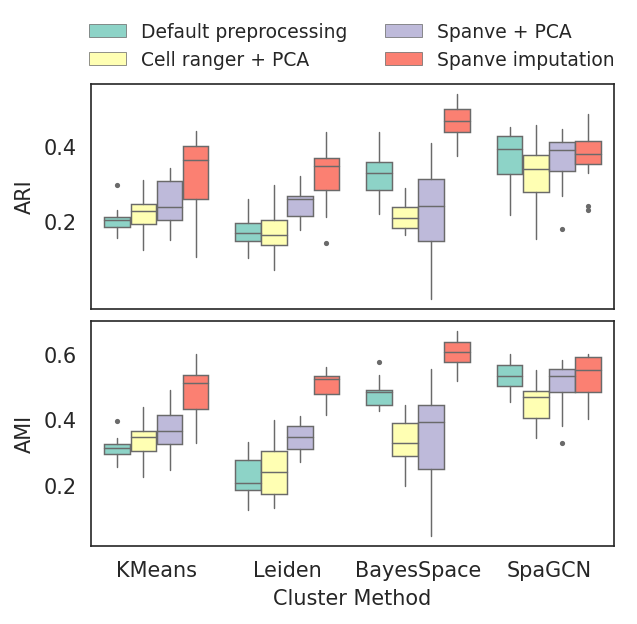

In [90]:
sns.set_style(style='white')
hue_order = ['Default preprocessing', 'Cell ranger + PCA', 'Spanve + PCA', 'Spanve imputation']
vis_kwargs = dict(
    palette = 'Set3', saturation=1,
    width=0.8, linewidth=0.7, 
    flierprops=dict(marker=".", markersize=3), showcaps = False,
    hue_order = hue_order,
    order = ['KMeans','Leiden','BayesSpace','SpaGCN']
)
f,axes = plt.subplots(2,1,dpi=150, figsize = (4.5,4)) 
f.subplots_adjust(hspace=0.05)
sns.boxplot(
    data=dfs,
    y='ari',x='cluster_method',hue='preprocess',
    ax=axes[0], **vis_kwargs
)
axes[0].set_xticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('ARI')
axes[0].set_yticks([0.2,0.4])
axes[0].legend(title = None, frameon=False, bbox_to_anchor  = (1.034,1.35), ncol = 2, fontsize = 9 )
plt.legend
sns.boxplot(
    data=dfs,
    y='ami',x='cluster_method',hue='preprocess',
    ax=axes[1], **vis_kwargs
)
axes[1].legend_.set_visible(False)
axes[1].set_ylabel('AMI')
axes[1].set_xlabel('Cluster Method')
f.savefig('./Results/Imputation_clust.pdf',bbox_inches='tight')